##                                                    *ANÁLISIS EXPLORATORIO DE DATOS*

#### *Introducción

Esta documentación es complementaria al documento Dashboard-maurogpini que se presenta como parte del informe global. La intención es introducir al cliente en una comprensión más detallada de la metodología de trabajo. Se sugiere enfáticamente la lectura de este documento de forma previa a la interacción con el resto del material.*

#### *Workflow

En esta etapa enunciaremos en términos generales la metodología de trabajo y las tareas realizadas. Recibimos 3 datasets para analizar y presentar los informes requeridos. Una vez realizada una exploración preliminar de dichos datasets, determinamos que presentan una serie de inconsistencias, omisiones y diversos formatos de información. Es necesario corregir dichas inconsistencias para el correcto estado inicial de la data previo al análisis y la simplificación del trabajo en la etapa posterior de la vida del dato.

El objetivo es poner cada uno de los datasets en condiciones para su análisis y realizar las consideraciones necesarias para unificarlo en un único dataset con toda la información condensada. Para ello es necesario realizar los siguientes pasos:

•	Primero trabajaremos con los datasets por separado, transformándolos en DataFames (DF) de la librería pandas, para optimizar la manipulación de los datos. Realizaremos de forma individual un EDA y transformación de dichos datos.
•	Eliminaremos aquellas columnas que proveen información que no nos es de utilidad para el análisis, con el objetivo de simplificar la gestión y la posterior presentación de la información.
•	Unificaremos los criterios y los nombres de las columnas para los datos que son de igual naturaleza en cada DF, y los procederemos a unificar en un DF generalizado. El objetivo de esta práctica es simular un dataframe con los datos del mercado, y no de una de las empresas que tenemos en particular.*


### *Instalación de las bibliotecas necesarias.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from langdetect import detect
from wordcloud import WordCloud ,  STOPWORDS   

### *Importación de archivos, creación de DFs y EDA introductorio.*

En esta etpa introductoria del análisis miraré la estructura, conformación, tipología y características generales de los DF para ir familiarizándome con ellos.

In [2]:
df_cc = pd.read_csv('moocs/Coursera_courses.csv')
df_cr = pd.read_csv('moocs/Coursera_reviews.csv')
df_ec = pd.read_csv('moocs/edx_courses.csv') 
df_uc = pd.read_csv('moocs/udemy_courses.csv')

#### 1) *Dataframe Coursera Courses --> _cc*

In [3]:
df_cc.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [4]:
df_cc.loc[0]

name                                          Machine Learning
institution                                Stanford University
course_url     https://www.coursera.org/learn/machine-learning
course_id                                     machine-learning
Name: 0, dtype: object

In [5]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [6]:
df_cc.describe()

,name,institution,course_url,course_id
count,623,623,623,623
unique,622,134,623,623
top,Introduction to Psychology,University of Pennsylvania,https://www.coursera.org/learn/machine-learning,machine-learning
freq,2,43,1,1


In [7]:
# Veo los nombres y el formato de los ids de la carrera.

df_cc.course_id.value_counts

<bound method IndexOpsMixin.value_counts of 0                      machine-learning
1                     indigenous-canada
2             the-science-of-well-being
3        technical-support-fundamentals
4              google-cbrs-cpi-training
                     ...               
618    accounting-data-analytics-python
619                        spectroscopy
620                 managing-as-a-coach
621                  hotel-distribution
622                 data-science-course
Name: course_id, Length: 623, dtype: object>

In [8]:
df_cc.loc[df_cc['name'].duplicated()]

,name,institution,course_url,course_id
54,Introduction to Psychology,University of Toronto,https://www.coursera.org/learn/introduction-psych,introduction-psych


In [9]:
df_cc.loc[df_cc['name'] == 'Introduction to Psychology']

,name,institution,course_url,course_id
6,Introduction to Psychology,Yale University,https://www.coursera.org/learn/introduction-ps...,introduction-psychology
54,Introduction to Psychology,University of Toronto,https://www.coursera.org/learn/introduction-psych,introduction-psych


Vemos que el curso repetido se debe a que se dicta en dos instituciones diferentes. Por ende no hay un error de duplicación.

Por los demás aspectos vemos que el DF está en condiciones óptimas para su análisis.

***

#### 2) *Dataframe Coursera Reviews --> _cr*

In [10]:
df_cr.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [11]:
df_cr.loc[0]

reviews         Pretty dry, but I was able to pass with just t...
reviewers                                             By Robert S
date_reviews                                         Feb 12, 2020
rating                                                          4
course_id                                google-cbrs-cpi-training
Name: 0, dtype: object

In [12]:
# La variable rating tiene 5 categorías.
df_cr.rating.value_counts()

5    1146164
4     226702
3      48303
1      17354
2      16188
Name: rating, dtype: int64

In [13]:
df_cr.iloc[0,0]

"Pretty dry, but I was able to pass with just two complete watches so I'm happy about that.  As usual there were some questions on the final exam that were NO WHERE in the course, which is annoying but far better than many microsoft tests I have taken.  Never found the suplimental material that the course references... but who cares... i passed!"

In [14]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [15]:
# Tengo registros con valores faltantes en las columnas reviews. Las demás columnas están en perfectas condiciones.

df_cr.isnull().sum()

reviews         140
reviewers         0
date_reviews      0
rating            0
course_id         0
dtype: int64

In [16]:
df_cr.astype({'reviews': str}).dtypes

reviews         object
reviewers       object
date_reviews    object
rating           int64
course_id       object
dtype: object

In [17]:
# Lleno esos campos vacíos con el valor NA (not available).
df_cr['reviews'].fillna('NA',inplace=True)

In [18]:
# Compruebo la existencia de registros duplicados.

df_cr[df_cr['reviews'].duplicated()]

,reviews,reviewers,date_reviews,rating,course_id
30,Great course,By Mark B,"Dec 03, 2019",5,google-cbrs-cpi-training
31,Solid presentation all the way through. I real...,By Logan D,"Sep 03, 2020",5,google-cbrs-cpi-training
32,Probably the best certification course I've ta...,By Luis M C,"Nov 21, 2019",5,google-cbrs-cpi-training
33,The ProctorU.com system took 2 times the amoun...,By scott w,"Sep 28, 2020",5,google-cbrs-cpi-training
34,Covered all of the required information in an ...,By Ryan H,"Aug 26, 2019",5,google-cbrs-cpi-training
...,...,...,...,...,...
1454706,g,By Brijesh K,"Aug 25, 2020",5,computer-networking
1454707,.,By Vasavi V M,"Jul 02, 2020",5,computer-networking
1454708,.,By Drishti D,"Jun 20, 2020",5,computer-networking
1454709,.,By FAUSTINE F K,"Jun 07, 2020",5,computer-networking


Veo que esta estimación no me servirá, ya que mucha gente distinta respondió con valores como "." para cumplir con entregar una review. Si borrara los duplicados bajo este criterio, estaría desperdiciando muchísima data.

Voy eliminar los registros en los cuales el mismo reviewer dio una misma review sobre un mismo curso. Considero que este criterio de filtro es muy sólido para identificar verdaderos duplicados.

In [19]:
df_cr[df_cr.duplicated(['reviews','reviewers','course_id'] , keep=False)].sort_values(by='reviewers') 

,reviews,reviewers,date_reviews,rating,course_id
818738,It was really great experience.,By \t M N H,"Sep 02, 2020",5,grammar-punctuation
818713,It was really great experience.,By \t M N H,"Sep 02, 2020",5,grammar-punctuation
818688,It was really great experience.,By \t M N H,"Sep 02, 2020",5,grammar-punctuation
301798,This course is amazing. Python is so easy lang...,By \t M R I,"Sep 15, 2020",5,python-data
301748,This course is amazing. Python is so easy lang...,By \t M R I,"Sep 15, 2020",5,python-data
...,...,...,...,...,...
1326624,I loved the way of learning and how this cours...,By ���� � �,"Jan 19, 2020",5,strategic-management
1326599,I loved the way of learning and how this cours...,By ���� � �,"Jan 19, 2020",5,strategic-management
264422,thanks providing this excellent course. these...,By 🐻 �,"Aug 22, 2020",5,learning-how-to-learn
264447,thanks providing this excellent course. these...,By 🐻 �,"Aug 22, 2020",5,learning-how-to-learn


Vemos que gran parte de los registros tienen duplicados exactos. Porcederé a borrar las copias de los registros, guardando una ocurrencia de cada evento.

In [20]:
df_cr.drop_duplicates(['reviews','reviewers','course_id'] , keep='first' , inplace = True)

In [21]:
df_cr.shape

(519928, 5)

In [22]:
# Compruebo que existen la misma cantidad de Id de cursos que en df_cr y el formato es el mismo. 
# Por lo tanto la información puede unificarse en un solo DF.

df_cc.course_id.value_counts

<bound method IndexOpsMixin.value_counts of 0                      machine-learning
1                     indigenous-canada
2             the-science-of-well-being
3        technical-support-fundamentals
4              google-cbrs-cpi-training
                     ...               
618    accounting-data-analytics-python
619                        spectroscopy
620                 managing-as-a-coach
621                  hotel-distribution
622                 data-science-course
Name: course_id, Length: 623, dtype: object>

***

#### 3) *Dataframe EDX Courses --> _ec*

In [23]:
df_ec.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [24]:
df_ec.loc[0]

title                                               How to Learn Online
summary               Learn essential strategies for successful onli...
n_enrolled                                                      124,980
course_type                                     Self-paced on your time
institution                                                         edX
instructors                     Nina Huntemann-Robyn Belair-Ben Piscopo
Level                                                      Introductory
subject                                    Education & Teacher Training
language                                                        English
subtitles                                                       English
course_effort                                        2–3 hours per week
course_length                                                   2 Weeks
price                       FREE-Add a Verified Certificate for $49 USD
course_description    Designed for those who are new to elearnin

In [25]:
df_ec.loc[0,'course_syllabus']

"Welcome - We start with opportunities to meet your instructors and fellow learners. Self-care for Learning - In this module, we then explore baseline self-care strategies that will help you maintain a healthy mind for effective online learning, the connections between memory and learning, and the importance of sleep. Space, Time, and Technology - In this module we address the challenges involved with creating a space for learning, including managing your technology. We also cover techniques for time management and keeping a routine. Learning Strategies - This module will help you get the most out your online learning experience. We cover effective study strategies and practices, making plans and setting priorities, and practicing self-regulation skills. Communication and Community - In this module, we talk about the importance of social learning. We cover strategies for communication, collaborating, and building connections with your instructors and fellow learners. What's Next? - Get

In [26]:
df_ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [27]:
df_ec.isnull().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

***

#### 4) *Dataframe Udemy Courses --> _uc*

In [28]:
df_uc.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance


In [29]:
df_uc.loc[0]

course_id                                                        1070968
course_title                          Ultimate Investment Banking Course
url                    https://www.udemy.com/ultimate-investment-bank...
is_paid                                                             True
price                                                                200
num_subscribers                                                     2147
num_reviews                                                           23
num_lectures                                                          51
level                                                         All Levels
content_duration                                                     1.5
published_timestamp                                 2017-01-18T20:58:58Z
subject                                                 Business Finance
Name: 0, dtype: object

In [30]:
df_uc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [31]:
df_uc.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


***
***

### *TRANSFORMACIÓN Y UNIFICACIÓN DE CRITERIOS EN LOS DF*

#### 1) *Coursera*

Procedo a unificar los DF de la plataforma Coursera en uno solo.

In [32]:
# Unifico ambos DFs realizando un merge en la columna 'course_id'.

df_co = df_cc.merge(df_cr, on = 'course_id' , how='right')

In [33]:
df_co.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating
0,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4
1,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4
2,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4
3,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4


In [34]:
df_co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519928 entries, 0 to 519927
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   name          519928 non-null  object
 1   institution   519928 non-null  object
 2   course_url    519928 non-null  object
 3   course_id     519928 non-null  object
 4   reviews       519928 non-null  object
 5   reviewers     519928 non-null  object
 6   date_reviews  519928 non-null  object
 7   rating        519928 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 35.7+ MB


In [35]:
df_co.loc[0]

name            Become a CBRS Certified Professional Installer...
institution                             Google - Spectrum Sharing
course_url      https://www.coursera.org/learn/google-cbrs-cpi...
course_id                                google-cbrs-cpi-training
reviews         Pretty dry, but I was able to pass with just t...
reviewers                                             By Robert S
date_reviews                                         Feb 12, 2020
rating                                                          4
Name: 0, dtype: object

Una vez realizadas varias verificaciones, vemos que el DF unificado está en optimas condiciones.

Elimino la columna course_url que es irrelevante para el análisis posterior.

In [36]:
df_co.drop(['course_url'], axis=1, inplace=True)

Estimaré la cantidad de cursos vendidos en función de las reviews de cada curso

In [37]:
a = df_co.groupby(['course_id']).count()

In [38]:
a

,name,institution,reviews,reviewers,date_reviews,rating
course_id,,,,,,
aboriginal-education,67,67,67,67,67,67
access-control-sscp,45,45,45,45,45,45
accounting-analytics,468,468,468,468,468,468
accounting-data-analytics-python,8,8,8,8,8,8
actualizacion-manejo-diabetes-tipo-2,253,253,253,253,253,253
...,...,...,...,...,...,...
womens-health-human-rights,242,242,242,242,242,242
write-a-feature-length-screenplay-for-film-or-television,32,32,32,32,32,32
write-your-first-novel,20,20,20,20,20,20


Suponiendo que al final de cada curso se le pide de forma obligatoria a los alumnos que den una review, puedo estimar de forma bastante insesgada que la cantidad de reviewers de cada curso son quienes lo tomaron.
Paso seguido, añado la columna 'ventas_q' a df_co y le ingesto los datos de la columna reviewers del df de apoyo a.

In [39]:
df_co = df_co.merge(a['reviewers'], on = 'course_id' , how='right')

In [40]:
df_co.head()

,name,institution,course_id,reviews,reviewers_x,date_reviews,rating,reviewers_y
0,Aboriginal Worldviews and Education,University of Toronto,aboriginal-education,This course has great intentions and decent co...,By Colton W,"May 22, 2020",1,67
1,Aboriginal Worldviews and Education,University of Toronto,aboriginal-education,"This course is outdated, material needs to be ...",By Kinusan D S,"May 07, 2019",2,67
2,Aboriginal Worldviews and Education,University of Toronto,aboriginal-education,This course is quite short and does not includ...,By Colleen T,"Jun 03, 2020",2,67
3,Aboriginal Worldviews and Education,University of Toronto,aboriginal-education,Very dry and boring class for aboriginal studi...,By Jonathan G,"Dec 15, 2019",2,67
4,Aboriginal Worldviews and Education,University of Toronto,aboriginal-education,The information presented in the course was gr...,By Val H,"Jul 01, 2017",3,67


In [41]:
df_co.shape

(519928, 8)

In [42]:
df_co.rename(str.lower, axis='columns')
df_co.rename(columns={"name": "nombre", "institution": "institucion", "reviewers_x": "estudiante", "reviewers_y": "ventas_q"}, inplace=True)

Extraeré del campo date_reviews, el año y el mes de finalización del curso.

In [43]:
# Primero convierto el campo a un formato datetime
df_co['date_reviews'] = pd.to_datetime(df_co['date_reviews'])

In [44]:
# Hago las modificaciones creando los campos anio y mes
df_co['anio'] = df_co['date_reviews'].dt.year
df_co['mes'] = df_co['date_reviews'].dt.month_name(locale='Spanish')

In [45]:
# Utilizada la información de la columna, procedo a eliminarla junto a 'course_id' y 'reviews' que tampoco la necesito más.

df_co.drop(['date_reviews','course_id','reviews'], axis=1, inplace=True)

Detección de Outliers sobre los campos numéricos.

<AxesSubplot: xlabel='rating'>

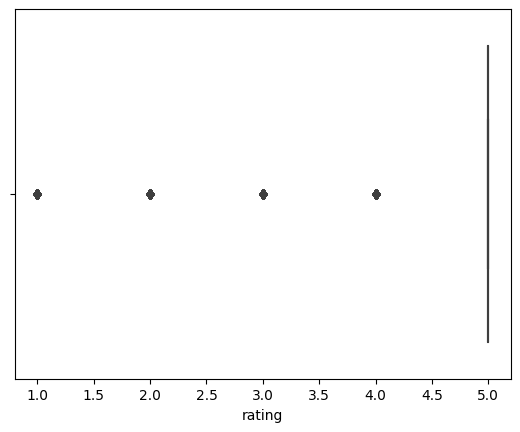

In [46]:
# Grafico a variable rating. Confirmamos que está en óptimas condiciones.

sns.boxplot(x="rating", data=df_co)

<AxesSubplot: xlabel='ventas_q'>

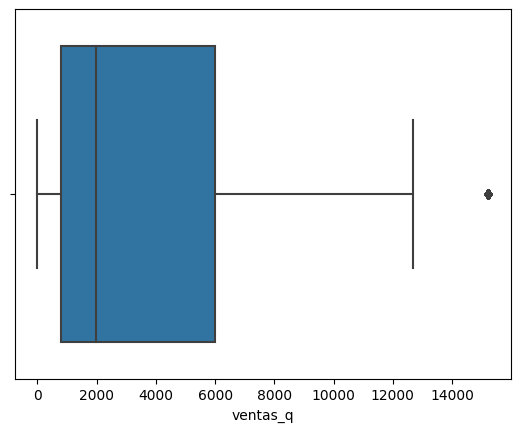

In [47]:
# Grafico a variable ventas_q.

sns.boxplot(x="ventas_q", data=df_co)

In [48]:
#Finalmente creo una columna que identifique que todos estos registros pertenecen a la plataforma coursera.

df_co['plataforma'] = 'coursera'

In [49]:
# Chequeo que se hayan implementado todos los cambios.
df_co.head()

,nombre,institucion,estudiante,rating,ventas_q,anio,mes,plataforma
0,Aboriginal Worldviews and Education,University of Toronto,By Colton W,1,67,2020,Mayo,coursera
1,Aboriginal Worldviews and Education,University of Toronto,By Kinusan D S,2,67,2019,Mayo,coursera
2,Aboriginal Worldviews and Education,University of Toronto,By Colleen T,2,67,2020,Junio,coursera
3,Aboriginal Worldviews and Education,University of Toronto,By Jonathan G,2,67,2019,Diciembre,coursera
4,Aboriginal Worldviews and Education,University of Toronto,By Val H,3,67,2017,Julio,coursera


***

#### 2) *EDX*

In [50]:
df_ec.head(2)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...


In [51]:
df_ec.loc[0]

title                                               How to Learn Online
summary               Learn essential strategies for successful onli...
n_enrolled                                                      124,980
course_type                                     Self-paced on your time
institution                                                         edX
instructors                     Nina Huntemann-Robyn Belair-Ben Piscopo
Level                                                      Introductory
subject                                    Education & Teacher Training
language                                                        English
subtitles                                                       English
course_effort                                        2–3 hours per week
course_length                                                   2 Weeks
price                       FREE-Add a Verified Certificate for $49 USD
course_description    Designed for those who are new to elearnin

In [52]:
df_ec.rename(columns={"title": "nombre", "n_enrolled": "ventas_q", "course_type":"formato", "subject": "tema", "Level":"nivel", "course_effort":"hs_semana" , "course_length":"semanas", "price":"precio",  "language": "idioma", "institution": "institucion"}, inplace=True)

In [53]:
# Elimino las columnas innecesarias.

df_ec.drop(['course_url', "summary", "course_description", "course_syllabus", "instructors",  "subtitles"], axis=1, inplace=True)

In [54]:
df_ec.describe()

,nombre,ventas_q,formato,institucion,nivel,tema,idioma,hs_semana,semanas,precio
count,975,855,975,975,975,975,975,975,975,975
unique,972,849,2,111,3,31,9,53,18,47
top,Introduction to Probability,"97,291",Self-paced on your time,Harvard University,Introductory,Computer Science,English,2–4 hours per week,4 Weeks,FREE-Add a Verified Certificate for $49 USD
freq,2,2,917,104,621,166,777,108,194,270


In [55]:
# Voy a chequear por registros duplicados

df_ec['nombre'].duplicated().sum()

3

In [56]:
df_ec[df_ec['nombre'].duplicated(keep = False)].sort_values(by='nombre')

,nombre,ventas_q,formato,institucion,nivel,tema,idioma,hs_semana,semanas,precio
161,Introduction to Marketing,"169,126",Self-paced on your time,University of British Columbia,Introductory,Business & Management,English,3–5 hours per week,6 Weeks,FREE-Add a Verified Certificate for $150 USD
561,Introduction to Marketing,NaN,Self-paced on your time,The University of Edinburgh,Introductory,Business & Management,English,2–3 hours per week,6 Weeks,FREE-Add a Verified Certificate for $149 USD
59,Introduction to Probability,"97,291",Self-paced on your time,Harvard University,Intermediate,Data Analysis & Statistics,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD
95,Introduction to Probability,"97,291",Self-paced on your time,Harvard University,Intermediate,Data Analysis & Statistics,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD
159,Marketing Management,"80,010",Self-paced on your time,Indian Institute of Management Bangalore,Intermediate,Business & Management,English,2–4 hours per week,9 Weeks,FREE-Add a Verified Certificate for $150 USD
388,Marketing Management,"43,415",Instructor-led on a course schedule,"The University of Maryland, College Park-Unive...",Advanced,Business & Management,English,8–10 hours per week,7 Weeks,FREE-Add a Verified Certificate for $214 USD


Veo que el único curso que está repetido es Introduction to probability. Los demás son versiones de diferentes universidades y niveles pero con el mismo nombre.

In [57]:
# Procedo a eliminarlo.

df_ec.drop(95, inplace=True)

In [58]:
# Chequeo valores nulos
df_ec.isnull().sum()

nombre           0
ventas_q       120
formato          0
institucion      0
nivel            0
tema             0
idioma           0
hs_semana        0
semanas          0
precio           0
dtype: int64

Decido pasar los nulos en la columna ventas_q como '0', lo cual implica que no hubieron asistentes al curso. Al no tener datos sobre reviewers o reviews en esta tabla, ni siquiera puedo estimar una cantidad.

In [59]:
df_ec['ventas_q'].fillna('0', inplace=True)

Operación sobre la columna precio.

In [60]:
# Extraigo el campo numérico de la columa precio que me otorga el guarismo que necesito, y lo reescribo sobre la columna 'price'.

df_ec = df_ec.assign(precio = lambda x: x['precio'].str.extract('(\d+)')) 

Operación sobre la columa semanas.

In [61]:
# Idem sobre la columna semanas.

df_ec = df_ec.assign(semanas = lambda x: x['semanas'].str.extract('(\d+)')) 

Operación sobre la columa hs/semana

In [62]:
df_ec = df_ec.assign( hs_semana = lambda x: x['hs_semana'].str.extract('(\d+)')) 

In [63]:
# Procedo a crear la columna 'duracion', calculada por las horas semanles multiplicadas por las semanas de duración del curso.
# Para eso primero me sercioro de que los tipos de datos sean aptos para la operación.

print(type(df_ec['semanas'][0]))
print(type(df_ec['hs_semana'][0]))

<class 'str'>
<class 'str'>


In [64]:
df_ec['hs_semana'] = df_ec['hs_semana'].astype('int')
df_ec['semanas'] = df_ec['semanas'].astype('int')

In [65]:
df_ec['duracion'] = df_ec['hs_semana'] * df_ec['semanas']

In [66]:
# Compruebo que las transformaciones están correctamemte realizadas.

df_ec.head(2)

,nombre,ventas_q,formato,institucion,nivel,tema,idioma,hs_semana,semanas,precio,duracion
0,How to Learn Online,"124,980",Self-paced on your time,edX,Introductory,Education & Teacher Training,English,2,2,49,4
1,Programming for Everybody (Getting Started wit...,"293,864",Self-paced on your time,The University of Michigan,Introductory,Computer Science,English,2,7,49,14


In [67]:
# Elimino las columnas que utilicé para crear 'duracion'.

df_ec.drop(['hs_semana', 'semanas'], axis=1, inplace=True)

In [68]:
#Finalmente creo una columna que identifique que todos estos registros pertenecen a la plataforma edx.

df_ec['plataforma'] = 'edx'

In [69]:
df_ec.head(2)

,nombre,ventas_q,formato,institucion,nivel,tema,idioma,precio,duracion,plataforma
0,How to Learn Online,"124,980",Self-paced on your time,edX,Introductory,Education & Teacher Training,English,49,4,edx
1,Programming for Everybody (Getting Started wit...,"293,864",Self-paced on your time,The University of Michigan,Introductory,Computer Science,English,49,14,edx


Transformo las columas precio y ventas_q a formato numérico para poder trabajarlas.

In [70]:
#Cambio las comas por puntos y el tipo de variable.

df_ec['precio'] = df_ec['precio'].str.replace(',','')
df_ec['precio'] = df_ec['precio'].astype('int')


<AxesSubplot: xlabel='precio'>

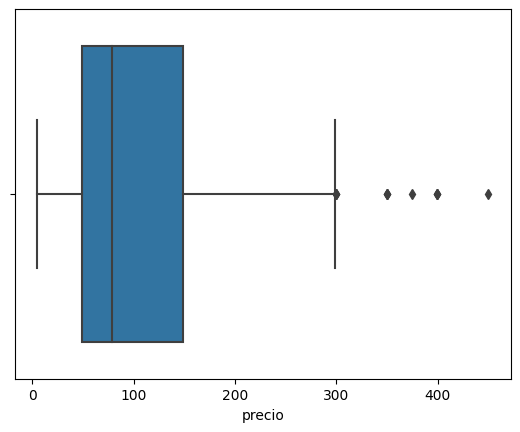

In [71]:
# Chequeo la posible existencia de outliers.

sns.boxplot(x ='precio', data = df_ec)

In [72]:
#Cambio las comas por puntos y el tipo de variable.

df_ec['ventas_q'] = df_ec['ventas_q'].str.replace(',','')
df_ec['ventas_q'] = df_ec['ventas_q'].astype('int')

<AxesSubplot: xlabel='ventas_q'>

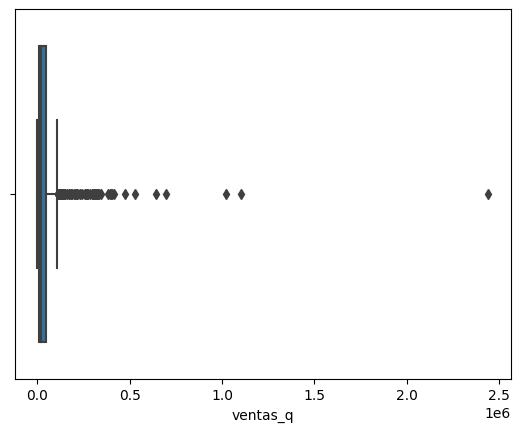

In [73]:
sns.boxplot(x="ventas_q", data=df_ec)

In [74]:
# Veo que hay algunos valores muy elevados, procedo a chequearlos y confirmo en la página de la empresa que efectivamente esos valores son correctos.

df_ec[df_ec['ventas_q'] > 1000000]

,nombre,ventas_q,formato,institucion,nivel,tema,idioma,precio,duracion,plataforma
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,Introductory,Computer Science,English,90,72,edx
29,IELTS Academic Test Preparation,1103777,Self-paced on your time,The University of Queensland,Introductory,Communication,English,99,40,edx
31,TOEFL® Test Preparation: The Insider’s Guide,1022489,Self-paced on your time,Educational Testing Service,Introductory,Communication,English,49,12,edx


Creo la columna ventas_usd, que me brindará la facturación de cada curso.

In [75]:
df_ec['ventas_usd'] = df_ec['ventas_q'] * df_ec['precio']

In [76]:
df_ec['idioma'].value_counts()

English          776
Español          176
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
اللغة العربية      1
Deutsch            1
Name: idioma, dtype: int64

In [77]:
df_ec.head()

,nombre,ventas_q,formato,institucion,nivel,tema,idioma,precio,duracion,plataforma,ventas_usd
0,How to Learn Online,124980,Self-paced on your time,edX,Introductory,Education & Teacher Training,English,49,4,edx,6124020
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Introductory,Computer Science,English,49,14,edx,14399336
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,Introductory,Computer Science,English,90,72,edx,219804390
3,The Analytics Edge,129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Intermediate,Data Analysis & Statistics,English,199,130,edx,25781445
4,Marketing Analytics: Marketing Measurement Str...,81140,Self-paced on your time,"University of California, Berkeley",Introductory,Computer Science,English,249,20,edx,20203860


***

### 3) *Udemy*

In [78]:
df_uc.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance


In [79]:
# Vemos que el DF no presenta valores nulos
df_uc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [80]:
df_uc.rename(columns={"course_title": "nombre", "num_subscribers": "ventas_q", "course_type":"formato", "subject": "tema", "level":"nivel", "course_effort":"hs/semana" , "content_duration":"duracion", "price":"precio", 'num_lectures': "clases_q" }, inplace=True)

In [81]:
#Finalmente creo una columna que identifique que todos estos registros pertenecen a la plataforma coursera.

df_uc['plataforma'] = 'udemy'


Extraeré del campo 'published_timestamp', el año y el mes de finalización del curso.

In [82]:
# Primero convierto el campo a un formato datetime
df_uc['published_timestamp'] = pd.to_datetime(df_uc['published_timestamp'])

In [83]:
# Hago las modificaciones creando los campos anio y mes
df_uc['anio'] = df_uc['published_timestamp'].dt.year
df_uc['mes'] = df_uc['published_timestamp'].dt.month_name(locale='Spanish')

In [84]:
# Utilizada la información de la columna, procedo a eliminarla junto a las otras que no aportan al análisis.

df_uc.drop(['course_id'], axis=1, inplace=True) 
df_uc.drop(['published_timestamp'], axis=1, inplace=True)
df_uc.drop(['url'], axis=1, inplace=True)
df_uc.drop(['is_paid'], axis=1, inplace=True)
df_uc.drop(['num_reviews'], axis=1, inplace=True) 


In [85]:
df_uc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nombre      3678 non-null   object 
 1   precio      3678 non-null   int64  
 2   ventas_q    3678 non-null   int64  
 3   clases_q    3678 non-null   int64  
 4   nivel       3678 non-null   object 
 5   duracion    3678 non-null   float64
 6   tema        3678 non-null   object 
 7   plataforma  3678 non-null   object 
 8   anio        3678 non-null   int64  
 9   mes         3678 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 287.5+ KB


Chequeo la existencia de duplicados

In [86]:
df_uc.duplicated().sum()

6

In [87]:
df_uc[df_uc.duplicated(keep=False)].sort_values(by='nombre')

,nombre,precio,ventas_q,clases_q,nivel,duracion,tema,plataforma,anio,mes
463,CFA Level 2- Quantitative Methods,40,0,35,All Levels,5.500000,Business Finance,udemy,2017,Julio
1100,CFA Level 2- Quantitative Methods,40,0,35,All Levels,5.500000,Business Finance,udemy,2017,Julio
453,Essentials of money value: Get a financial Life !,20,0,20,All Levels,0.616667,Business Finance,udemy,2016,Mayo
787,Essentials of money value: Get a financial Life !,20,0,20,All Levels,0.616667,Business Finance,udemy,2016,Mayo
454,Introduction to Forex Trading Business For Beg...,20,0,27,Beginner Level,1.500000,Business Finance,udemy,2017,Abril
788,Introduction to Forex Trading Business For Beg...,20,0,27,Beginner Level,1.500000,Business Finance,udemy,2017,Abril
2478,Learn Web Designing & HTML5/CSS3 Essentials in...,75,43285,24,All Levels,4.000000,Web Development,udemy,2013,Enero
2561,Learn Web Designing & HTML5/CSS3 Essentials in...,75,43285,24,All Levels,4.000000,Web Development,udemy,2013,Enero
1234,MicroStation - Células,20,0,9,Beginner Level,0.616667,Graphic Design,udemy,2014,Abril
1473,MicroStation - Células,20,0,9,Beginner Level,0.616667,Graphic Design,udemy,2014,Abril


In [88]:
df_uc.columns

Index(['nombre', 'precio', 'ventas_q', 'clases_q', 'nivel', 'duracion', 'tema',
       'plataforma', 'anio', 'mes'],
      dtype='object')

In [89]:
# Al confirmar que efectivamente están repetidos procedo a eliminarlos.

df_uc.drop_duplicates(keep='first' , inplace = True)

In [90]:
# Chequeo especificamente en la columna de los cursos. Veo que no son el mismo producto.
df_uc[df_uc.duplicated(['nombre'] , keep=False)].sort_values(by='nombre')

,nombre,precio,ventas_q,clases_q,nivel,duracion,tema,plataforma,anio,mes
2062,Acoustic Blues Guitar Lessons,0,8217,10,Intermediate Level,1.000000,Musical Instruments,udemy,2013,Septiembre
2067,Acoustic Blues Guitar Lessons,125,1284,40,Intermediate Level,12.500000,Musical Instruments,udemy,2013,Noviembre
2158,Acoustic Blues Guitar Lessons,75,189,101,Intermediate Level,4.500000,Musical Instruments,udemy,2016,Enero
2130,Aprende a tocar el acordeón de botones,50,22,21,All Levels,3.500000,Musical Instruments,udemy,2014,Mayo
2332,Aprende a tocar el acordeón de botones,50,20,24,Beginner Level,2.000000,Musical Instruments,udemy,2017,Mayo
1301,Creating an animated greeting card via Google ...,20,1504,9,Beginner Level,1.500000,Graphic Design,udemy,2016,Enero
1334,Creating an animated greeting card via Google ...,20,549,8,Beginner Level,1.000000,Graphic Design,udemy,2016,Abril
1447,Creating an animated greeting card via Google ...,20,770,8,Intermediate Level,1.000000,Graphic Design,udemy,2016,Mayo
2375,Drum Lessons For Beginners,95,14,34,Beginner Level,2.500000,Musical Instruments,udemy,2016,Abril
2445,Drum Lessons For Beginners,50,70,17,Beginner Level,1.500000,Musical Instruments,udemy,2014,Mayo


Veo que son todos productos diversos, aunque presentan ciertas similitudes en algunos campos.

Chequeo la existencia de outliers en los campos precio, ventas_q y duración.

<AxesSubplot: xlabel='precio'>

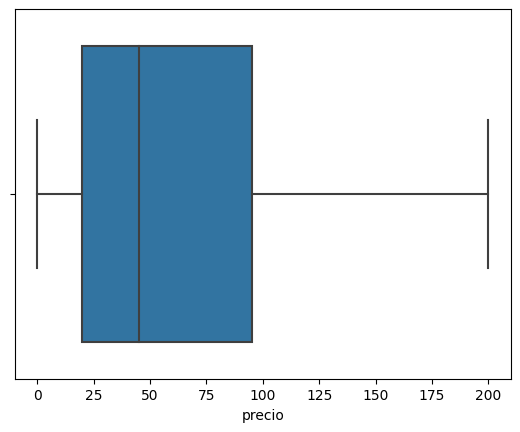

In [91]:
sns.boxplot(x="precio", data=df_uc)

<AxesSubplot: xlabel='ventas_q'>

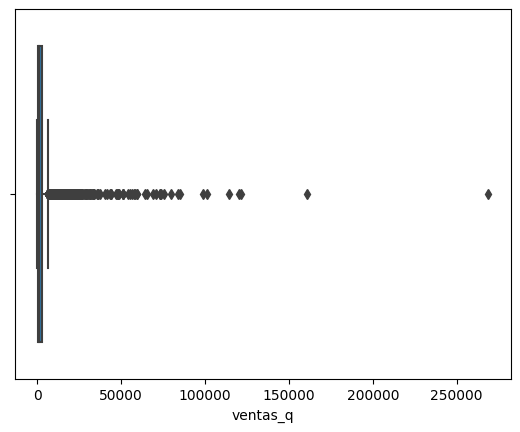

In [92]:
sns.boxplot(x="ventas_q", data=df_uc)

In [93]:
# Luego de testear los datos en la página oficial de Udemy, puedo corroborar que los valores son verídicos.
df_uc[df_uc['ventas_q'] > 100000]

,nombre,precio,ventas_q,clases_q,nivel,duracion,tema,plataforma,anio,mes
1896,Free Beginner Electric Guitar Lessons,0,101154,95,Beginner Level,4.5,Musical Instruments,udemy,2012,Junio
2783,Build Your First Website in 1 Week with HTML5 ...,0,120291,30,Beginner Level,3.0,Web Development,udemy,2014,Abril
2827,Learn HTML5 Programming From Scratch,0,268923,45,All Levels,10.5,Web Development,udemy,2013,Febrero
3032,Coding for Entrepreneurs Basic,0,161029,27,Beginner Level,3.5,Web Development,udemy,2013,Junio
3230,The Web Developer Bootcamp,200,121584,342,All Levels,43.0,Web Development,udemy,2015,Noviembre
3232,The Complete Web Developer Course 2.0,200,114512,304,All Levels,30.5,Web Development,udemy,2016,Marzo


<AxesSubplot: xlabel='duracion'>

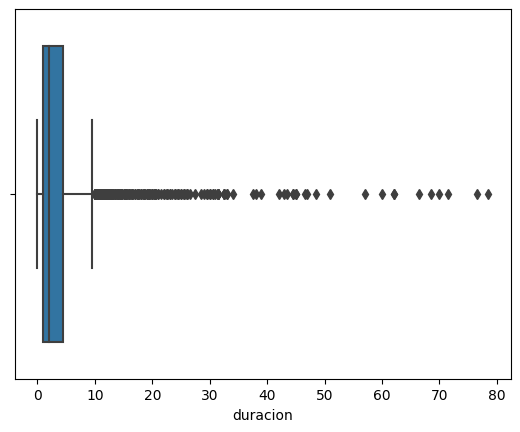

In [94]:
sns.boxplot(x="duracion", data=df_uc)

Ahora crearé la columna ventas_usd.

In [95]:
df_uc['ventas_usd'] = df_uc['ventas_q'] * df_uc['precio']

Utilizando la biblioteca langdetect, procedo a detectar el idioma del curso al identificar en idioma de su nombre.

In [96]:
df_uc['idioma'] = df_uc['nombre'].apply(detect)

In [97]:
df_uc['idioma'].value_counts()

en       3038
es        140
de         92
pt         68
ca         52
it         48
fr         47
no         43
ja         29
nl         19
tl         19
da         11
af          9
ar          9
sv          9
ro          9
et          5
zh-cn       4
tr          4
hr          3
ru          3
id          3
sw          2
th          2
vi          2
pl          1
ko          1
Name: idioma, dtype: int64

In [98]:
# Chequeo cuales son los valores de las categorías idioma en el DF de EDX, para homogeneizar criterios.

df_ec['idioma'].value_counts()

English          776
Español          176
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
اللغة العربية      1
Deutsch            1
Name: idioma, dtype: int64

In [99]:
df_uc['idioma'].replace({'en':'English','es':'Spanish','de':'Deutsch','pt':'Português','fr':'Français','it':'Italiano','ca':'Catalán'},inplace=True)

In [100]:
df_uc.head()

,nombre,precio,ventas_q,clases_q,nivel,duracion,tema,plataforma,anio,mes,ventas_usd,idioma
0,Ultimate Investment Banking Course,200,2147,51,All Levels,1.5,Business Finance,udemy,2017,Enero,429400,English
1,Complete GST Course & Certification - Grow You...,75,2792,274,All Levels,39.0,Business Finance,udemy,2017,Marzo,209400,English
2,Financial Modeling for Business Analysts and C...,45,2174,51,Intermediate Level,2.5,Business Finance,udemy,2016,Diciembre,97830,English
3,Beginner to Pro - Financial Analysis in Excel ...,95,2451,36,All Levels,3.0,Business Finance,udemy,2017,Mayo,232845,English
4,How To Maximize Your Profits Trading Options,200,1276,26,Intermediate Level,2.0,Business Finance,udemy,2016,Diciembre,255200,English


***
***

Una vez finalizada esta etapa, solo resta guardar los archivos en formato .csv para su posterior utilización en PowerBI. Los detalles que queden por modificar, los haré en dicha plataforma.

In [101]:
df_co.columns

Index(['nombre', 'institucion', 'estudiante', 'rating', 'ventas_q', 'anio',
       'mes', 'plataforma'],
      dtype='object')

In [102]:
df_ec.columns

Index(['nombre', 'ventas_q', 'formato', 'institucion', 'nivel', 'tema',
       'idioma', 'precio', 'duracion', 'plataforma', 'ventas_usd'],
      dtype='object')

In [103]:
df_uc.columns

Index(['nombre', 'precio', 'ventas_q', 'clases_q', 'nivel', 'duracion', 'tema',
       'plataforma', 'anio', 'mes', 'ventas_usd', 'idioma'],
      dtype='object')

In [104]:
# df_total['institucion'].fillna('NA', inplace=True)
# df_total['estudiante'].fillna('NA', inplace=True)
# df_total['anio'].fillna('NA', inplace=True)
# df_total['mes'].fillna('NA', inplace=True)
# df_total['formato'].fillna('NA', inplace=True)
# df_total['nivel'].fillna('NA', inplace=True)
# df_total['tema'].fillna('NA', inplace=True)
# df_total['idioma'].fillna('NA', inplace=True)
# # df_total['precio'].fillna(0, inplace=True)
# # df_total['duracion'].fillna(0, inplace=True)
# # df_total['clases_q'].fillna(0, inplace=True)

***
***

En este apartado realizaré el WordCloud solicitado por los empleadores.

Concateno la columna 'nombre' de los tres DF en un DF que los contenga todos.

In [105]:
df_nombres = pd.concat([df_co['nombre'],df_ec['nombre'],df_uc['nombre']],axis=0)

In [106]:
df_nombres.shape

(524574,)

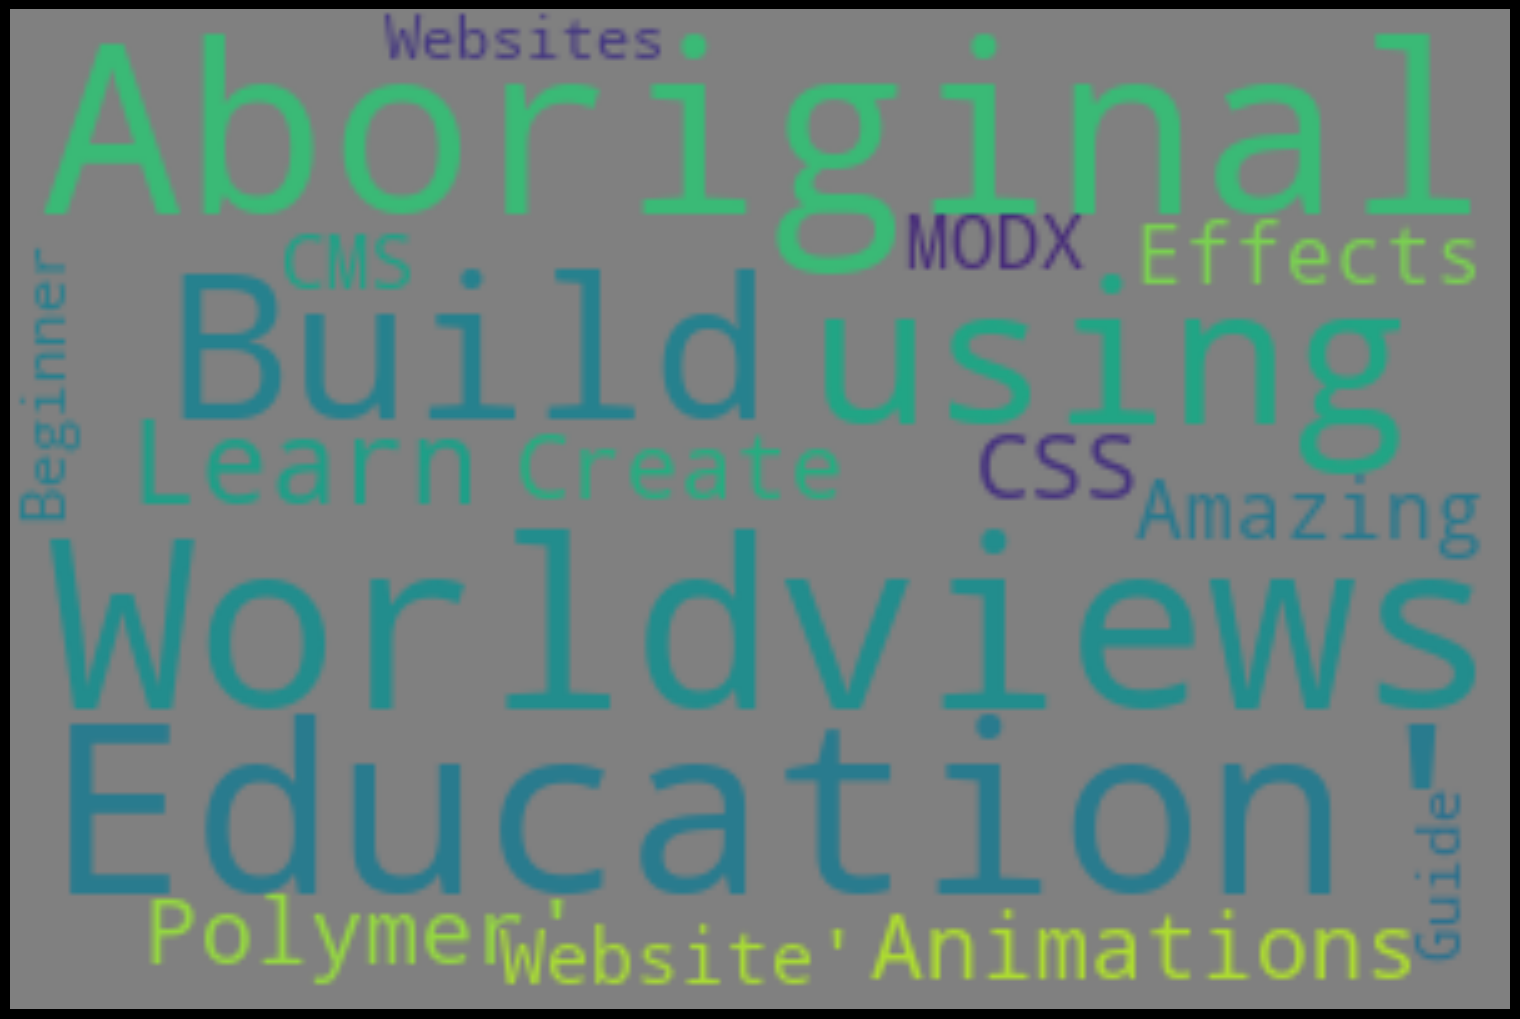

In [107]:
text = df_nombres.values
wordcloud = WordCloud(
    width = 300,
    height = 200,
    background_color = 'grey',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Otra buena forma de realizar esta gráfica es considerando sólo los valores sin repetición de la columna 'nombre'.

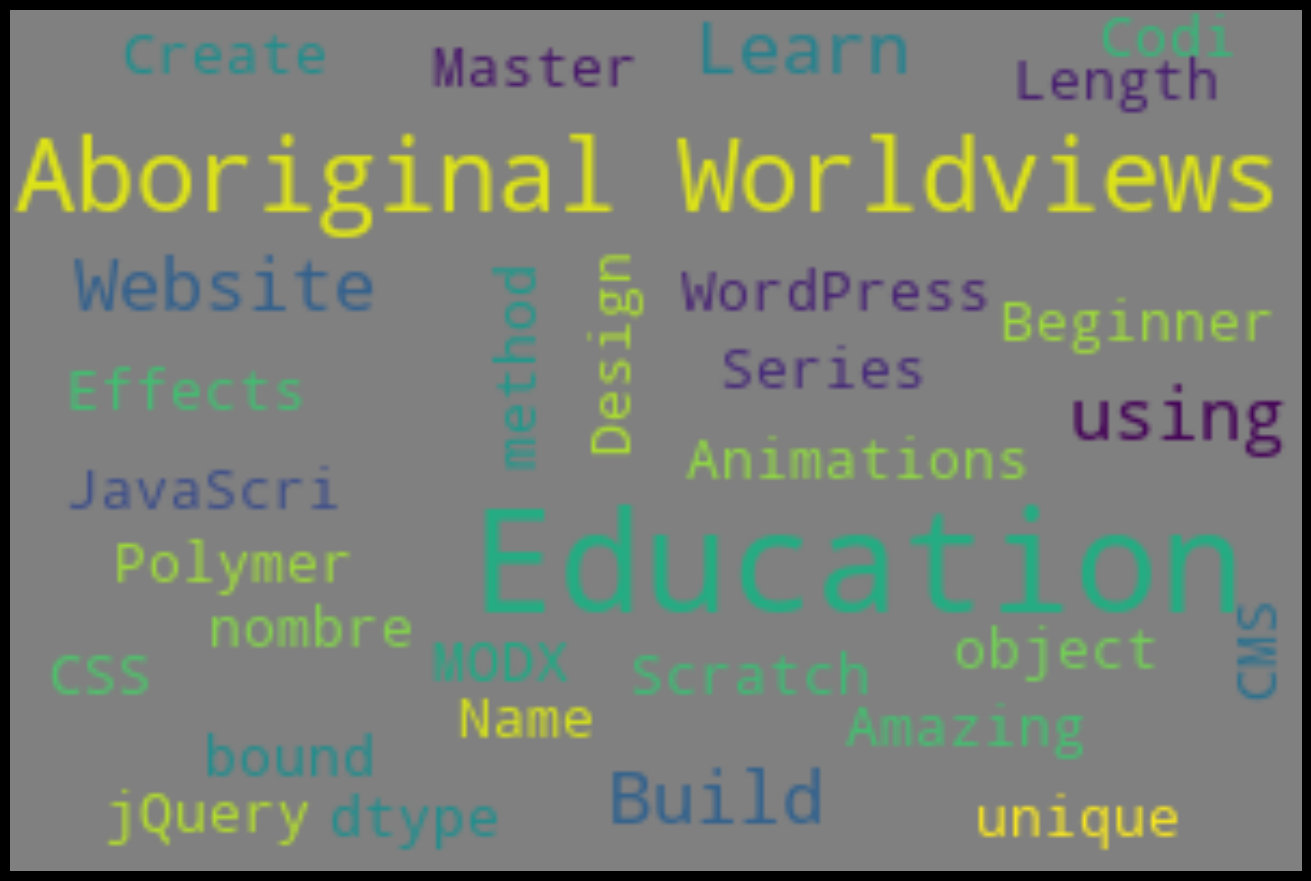

In [108]:
text = df_nombres.unique
wordcloud = WordCloud(
    width = 300,
    height = 200,
    background_color = 'grey',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=5)
plt.show()

Vemos que en este caso, al tomar una sola aparición de cada curso, tenemos una mejor apreciación de cuales son las palabras que más se repiten. Podemos apreciar como la importancia relativa de Education y Aboriginal Worldviews ha decaído.

***
***

En este apartado generaré DFs unificando los campos que son requeridos en las consultas puntuales del empleador. 
Es claro que habrá diferencias al comparar, por ej, las ventas según precio de la industria que las de solo una empresa.
Prepararé un dataset para analizar cada relación con los datos disponibles del mercado en términos de los requerimientos:

•	Nivel de ventas según precio
•	Nivel de ventas según idioma.
•	Nivel de ventas según nivel.
•	Nivel de ventas según rating.


•	*Transforamciones previas para lograr comparar Nivel de ventas según nivel.*


In [109]:
df_uc['nivel'].value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: nivel, dtype: int64

In [110]:
df_ec['nivel'].value_counts()

Introductory    621
Intermediate    266
Advanced         87
Name: nivel, dtype: int64

Antes de crear el DF unificado, tengo que unificar los valores de los niveles en un mismo criterio. Voy a modificar los de df_uc para aprovechar también a eliminar la palabra "Level" redundate en cada categoría (redundante dado que ya pertences al feature level).

In [111]:
df_uc['nivel'].replace({'Beginner Level':'Introductory','Intermediate Level':'Intermediate','Expert Level':'Advanced'},inplace=True)

Además de los indicadores solicitados, operaré sobre la columna duración, la cual considero útil.

In [112]:
df_ec['duracion'] = df_ec['duracion'].astype('int')
df_uc['duracion'] = df_uc['duracion'].astype('int')

Realizadas todas las transformaciones necesarias, concateno los DF para generar el DF llamado 'mercado'.

In [113]:
mercado = pd.concat([df_uc[['nombre','ventas_usd','ventas_q','precio','idioma','nivel','duracion']],
                     df_ec[['nombre','ventas_usd','ventas_q','precio','idioma','nivel','duracion']],
                     df_co[['nombre','ventas_q','rating','mes','anio']]])

In [114]:
mercado.head()

,nombre,ventas_usd,ventas_q,precio,idioma,nivel,duracion,rating,mes,anio
0,Ultimate Investment Banking Course,429400.0,2147,200.0,English,All Levels,1.0,NaN,NaN,NaN
1,Complete GST Course & Certification - Grow You...,209400.0,2792,75.0,English,All Levels,39.0,NaN,NaN,NaN
2,Financial Modeling for Business Analysts and C...,97830.0,2174,45.0,English,Intermediate,2.0,NaN,NaN,NaN
3,Beginner to Pro - Financial Analysis in Excel ...,232845.0,2451,95.0,English,All Levels,3.0,NaN,NaN,NaN
4,How To Maximize Your Profits Trading Options,255200.0,1276,200.0,English,Intermediate,2.0,NaN,NaN,NaN


In [124]:
mercado[mercado['duracion'] == 180]

,nombre,ventas_usd,ventas_q,precio,idioma,nivel,duracion,rating,mes,anio
733,Quantum Mechanics: A First Course,0.0,0,149.0,English,Advanced,180.0,NaN,NaN,NaN


<AxesSubplot: xlabel='duracion'>

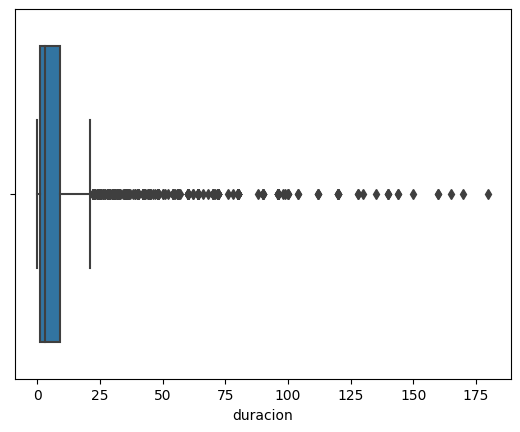

In [116]:
sns.boxplot(x="duracion", data=mercado)

### Guardo los datasets en csv para su posterior uso.

In [115]:
df_co.to_csv('Coursera.csv',index = False,header=True)
df_ec.to_csv('EDX.csv',index = False,header=True)
df_uc.to_csv('Udemy.csv',index = False,header=True)
mercado.to_csv('Mercado.csv',index = False,header=True)